# Dall-E 3 with Azure Open AI

DALL-E 3 is the latest image generation model from OpenAI. It features enhanced image quality, more complex scenes, and improved performance when rendering text in images. It also comes with more aspect ratio options. DALL-E 3 is available through OpenAI Studio and through the REST API.

In [1]:
#%pip install openai --upgrade

In [31]:
import json
import os
import requests
import openai
import sys

from dotenv import load_dotenv
from openai import AzureOpenAI
from PIL import Image

In [3]:
load_dotenv("azure.env")

# Azure Open AI
openai.api_type: str = "azure"
api_key = os.getenv("OPENAI_API_KEY")
api_base = os.getenv("OPENAI_API_BASE")
api_version="2023-12-01-preview"
print('Open AI version:', openai.__version__)

Open AI version: 1.3.0


In [32]:
sys.version

'3.10.10 (main, Mar 21 2023, 18:45:11) [GCC 11.2.0]'

## Directory to save the generated images

In [4]:
image_dir = os.path.join(os.curdir, 'images')

if not os.path.isdir(image_dir):
    os.mkdir(image_dir)

## Function

In [5]:
client = AzureOpenAI(
    api_version=api_version,
    azure_endpoint=api_base,
    api_key=api_key,
)

In [24]:
def dalle3(prompt):
    """
    Dall e3 image
    """
    result = client.images.generate(
        model="dalle3",  # Name of the Dall e3 deployed model
        prompt=prompt,  # Prompt
        n=1,  # Number of images
    )
    
    # Loading the json results
    results = json.loads(result.model_dump_json())
    # Getting the url image
    image_url = results["data"][0]["url"]
    # Saving the image as a local file
    generated_image = requests.get(image_url).content
    output_file = os.path.join(image_dir, prompt[:50] + '.png')
    
    with open(output_file, "wb") as image_file:
        image_file.write(generated_image)
    
    # Return the image as a PIL image file
    img = Image.open(output_file)
    
    return img

## Dall-E3 examples

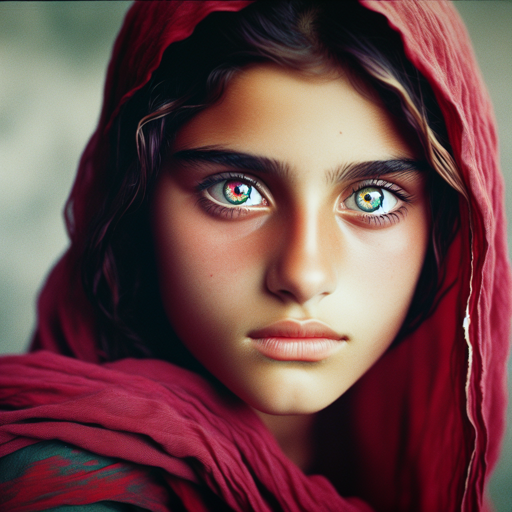

In [8]:
prompt = "a teenage girl of afghani descent with striking rainbow eyes stares at the camera \
with a deep read head scarf. kodachrome film"
print(prompt)

img = dalle3(prompt)
img.resize((512, 512))

Man, 50 years old, small beard, long hair, polaroid style


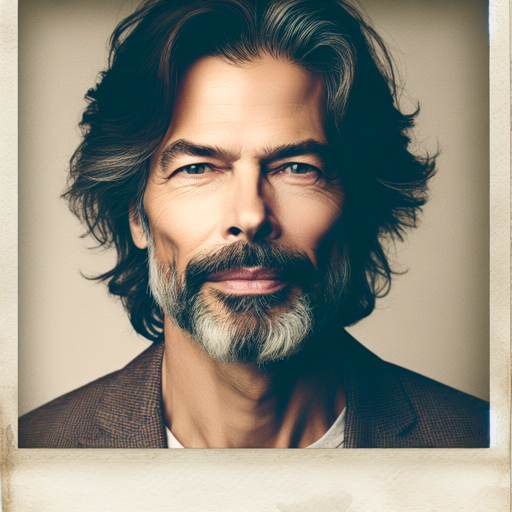

In [20]:
prompt = "Man, 50 years old, small beard, long hair, polaroid style"
print(prompt)

img = dalle3(prompt)
img.resize((512, 512))

Two people eating in a restaurant, realistic image


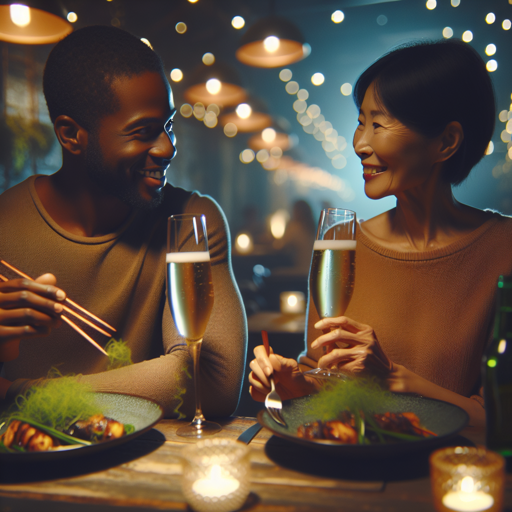

In [28]:
prompt = "Two people eating in a restaurant, realistic image"
print(prompt)

img = dalle3(prompt)
img.resize((512, 512))

Two people eating in a restaurant, cartoon style


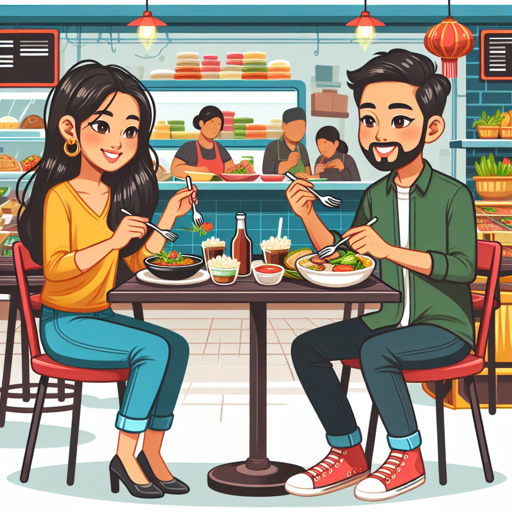

In [29]:
prompt = "Two people eating in a restaurant, cartoon style"
print(prompt)

img = dalle3(prompt)
img.resize((512, 512))

Sunlit indoor lounge area with a pool with clear water and another pool with translucent pastel lime water, next to a big window, digital art


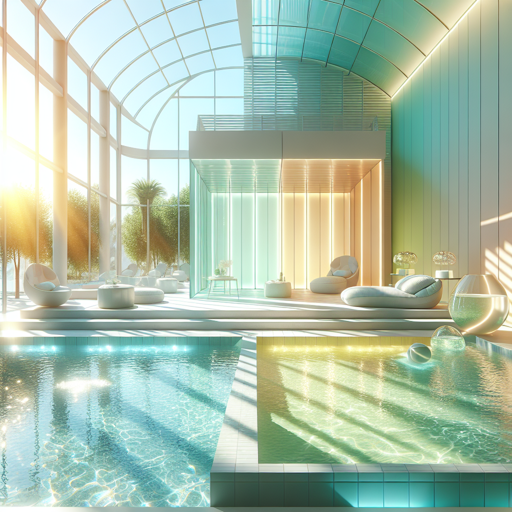

In [21]:
prompt = "Sunlit indoor lounge area with a pool with clear water and another pool with translucent \
pastel lime water, next to a big window, digital art"
print(prompt)

img = dalle3(prompt)
img.resize((512, 512))

man wearing a top hat and smoking a pipe sitting beside a window in a cafeteria while it rains outside by Renoir


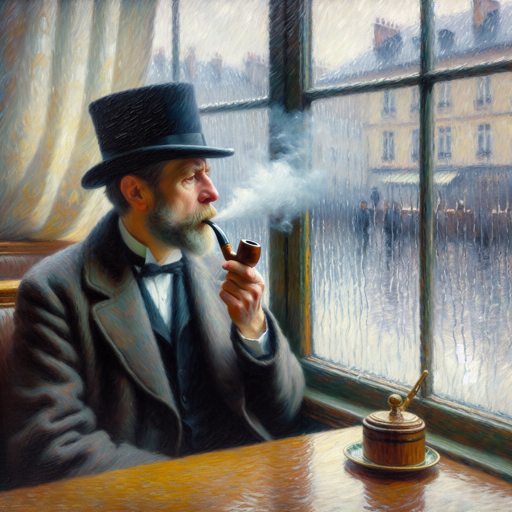

In [22]:
prompt = "man wearing a top hat and smoking a pipe sitting beside a window in a cafeteria while it rains outside by Renoir"
print(prompt)

img = dalle3(prompt)
img.resize((512, 512))

A portrait of a young computer engineer, sitting in front of a computer screen, working on a complex coding project. The engineer is a wearing a pair of glasses and a pair of headphones, and is surrounded by many computers’ equipment like keyboard, mouse, and monitor. The rooms is dimly lit with blue LED lights and the photograph is taken from a Sony Alpha 7 III camera with a prime lens set to F/2.8 and ISO set to 800.


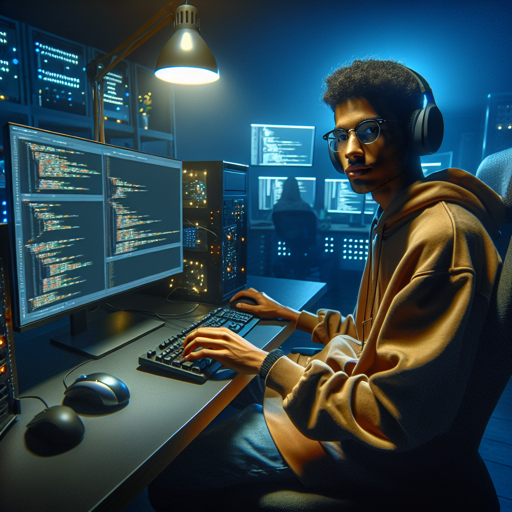

In [25]:
prompt = "A portrait of a young computer engineer, sitting in front of a computer screen, working on a complex \
coding project. The engineer is a wearing a pair of glasses and a pair of headphones, and is surrounded by many \
computers’ equipment like keyboard, mouse, and monitor. The rooms is dimly lit with blue LED lights and the \
photograph is taken from a Sony Alpha 7 III camera with a prime lens set to F/2.8 and ISO set to 800."
print(prompt)

img = dalle3(prompt)
img.resize((512, 512))

portrait of a young woman, brown medium hair, clean skin, hazel eyes, intricate artwork by Joaquin Sorolla, soft natural light, 85mm, sunshine on her


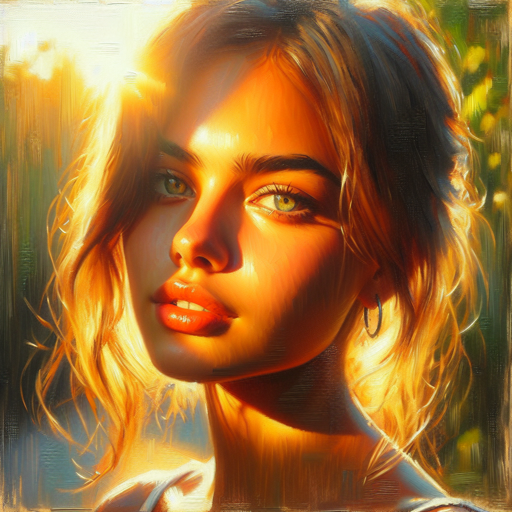

In [10]:
prompt = "portrait of a young woman, brown medium hair, clean skin, hazel eyes, \
intricate artwork by Joaquin Sorolla, soft natural light, 85mm, sunshine on her"
print(prompt)

img = dalle3(prompt)
img.resize((512, 512))

Beautiful Na'vi under water, avatar, photorealistic, james cameron, insane details


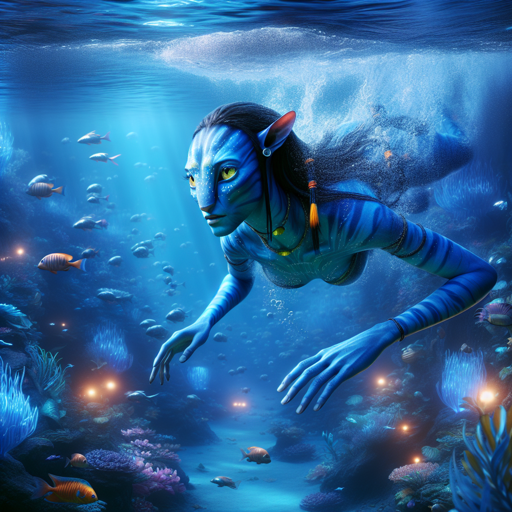

In [11]:
prompt = "Beautiful Na'vi under water, avatar, photorealistic, james cameron, insane details"
print(prompt)

img = dalle3(prompt)
img.resize((512, 512))

Beautiful Na'vi, avatar, photorealistic, james cameron, insane details


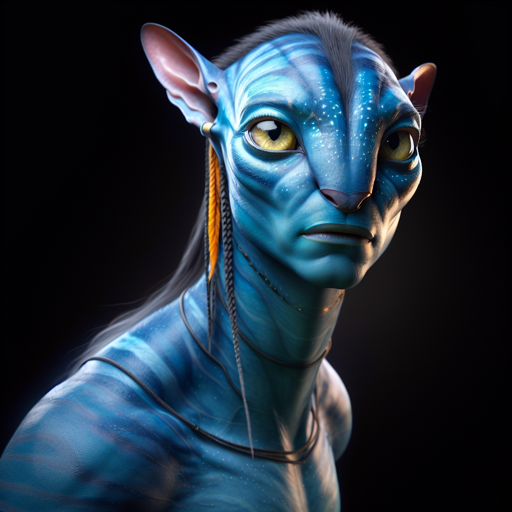

In [12]:
prompt = "Beautiful Na'vi, avatar, photorealistic, james cameron, insane details"
print(prompt)

img = dalle3(prompt)
img.resize((512, 512))

Children playing in the street


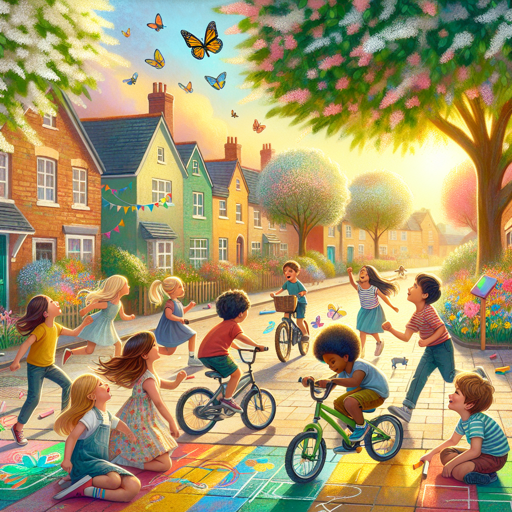

In [14]:
prompt = "Children playing in the street"
print(prompt)

img = dalle3(prompt)
img.resize((512, 512))

Children playing in the street in the style of Picasso


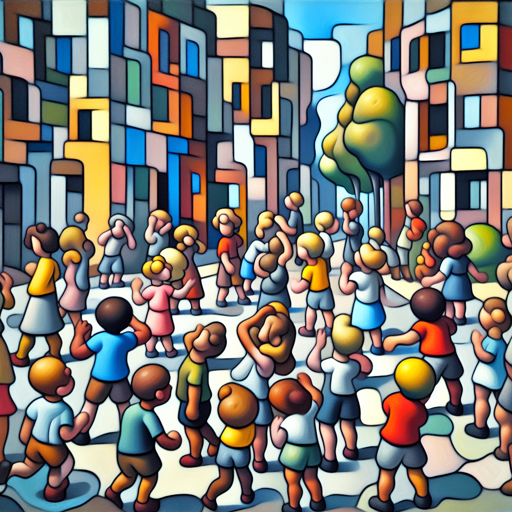

In [15]:
prompt = "Children playing in the street in the style of Picasso"
print(prompt)

img = dalle3(prompt)
img.resize((512, 512))

Children playing in the street in the style of Jean Michel Basquiat


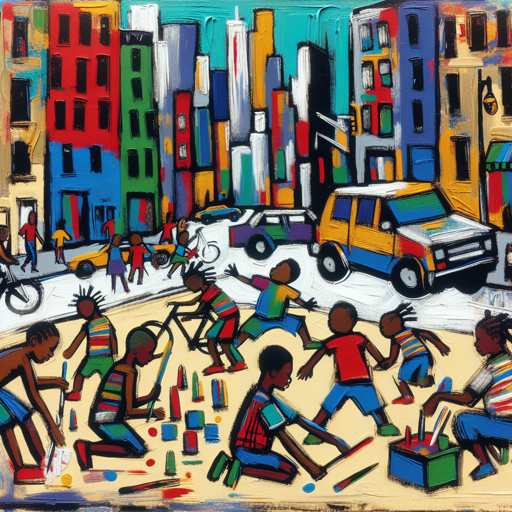

In [17]:
prompt = "Children playing in the street in the style of Jean Michel Basquiat"
print(prompt)

img = dalle3(prompt)
img.resize((512, 512))